In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os

In [42]:
img = image.load_img("Pics/0/IMG_1118.JPG")

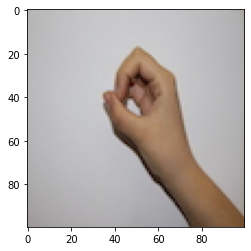

In [43]:
plt.imshow(img)

In [44]:
cv2.imread("Pics/0/IMG_1118.JPG").shape

(100, 100, 3)

In [45]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [46]:
train_dataset = train.flow_from_directory("Pics",(400,400),batch_size=3,class_mode='binary')

Found 411 images belonging to 2 classes.


In [47]:
validation_dataset = validation.flow_from_directory("Pics",(400,400),batch_size=3,class_mode='binary')

Found 411 images belonging to 2 classes.


In [48]:
train_dataset.class_indices

{'0': 0, '1': 1}

In [49]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (400,400,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [51]:
model.compile(loss='binary_crossentropy',optimizer = RMSprop(lr=0.001),metrics = ['accuracy'])

C:\Users\teera\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [52]:
model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs=20,validation_data=validation_dataset)

Epoch 1/20
3/3 [==============================] - 6s 3s/step - loss: 9.1696 - accuracy: 0.4444 - val_loss: 0.7164 - val_accuracy: 0.4988
Epoch 2/20
3/3 [==============================] - 5s 2s/step - loss: 0.6424 - accuracy: 0.7778 - val_loss: 0.7130 - val_accuracy: 0.4988
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: 0.8653 - accuracy: 0.2222 - val_loss: 0.6655 - val_accuracy: 0.5134
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.6102 - accuracy: 0.6667 - val_loss: 1.2141 - val_accuracy: 0.4988
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 0.7222 - accuracy: 0.6667 - val_loss: 0.6011 - val_accuracy: 0.9173
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: 0.5557 - accuracy: 0.7778 - val_loss: 0.4463 - val_accuracy: 0.8905
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.6454 - accuracy: 0.6667 - val_loss: 0.9679 - val_accuracy: 0.5012
Epoch 8/20
3/3 [=========================

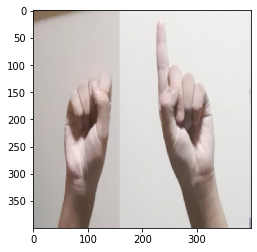

1


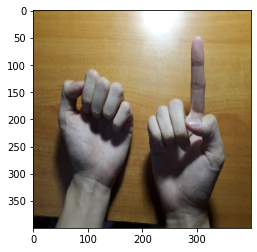

1


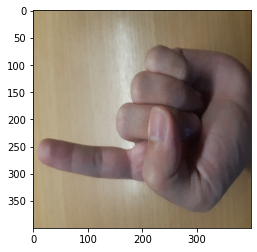

1


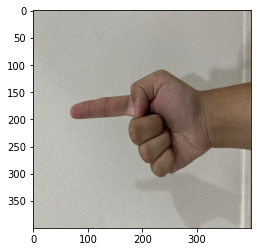

1


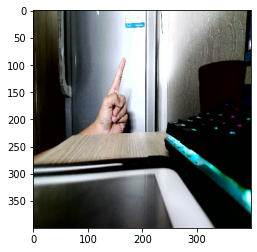

1


In [53]:
dir_path = "Test/1/1"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i,target_size=(400,400,3))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("0")
    else:
        print("1")